#   Coursera Course Data Exploratory Data Analysis

This is my notebook for my module 1, sprint 4 project, Data Visualization with Python. I will be preforming exploratory data analysis on the [Kaggle Coursera Course Dataset](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset). I will be focusing on producing visualisations. 

### Sections

- [Data Preparation](#data-prep)
    - [Feature Summary](#features)
- [Analysis](#analysis)
- [Improvements and Future Analysis](#improvements)

In this introduction, I will import the modules I will use throughout the notebook and the data set I am using. 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skewnorm

Importing the relevant modules.

In [130]:
data = pd.read_csv('coursea_data.csv', index_col=0)

Importing the data.

## Data Preparation<a name="data-prep"></a>

I am going to start by checking what data is in the dataset, what type of data it is, and whether there are any missing values.

In [131]:
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [132]:
len(data)

891

There are 891 observations in this dataset. Each observation is a course provided on Coursera. The courses has data about: the title, the organization, the certificate type received, the rating, the difficulty, and the number of student enrolled.

In [133]:
data.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

There is no missing data in this dataset, so I don't need to correct anything.

In [134]:
data.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

The column names are clear and logical, and can be used as dataframe attributes, so I won't make any changes.

In [135]:
data.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

`course_rating` has the correct data type - the rating is out of 5 and can be a decimal. 

`course_title`, `course_organization`, `course_Certificate_type` and `course_difficulty` also have the correct data type, as they are all descriptive strings.

`course_students_enrolled` however should be an integer, as it is the number of student enrolled in a course.

In [136]:
data['enrolled_end'] = data.course_students_enrolled.str[-1]
data.enrolled_end.unique()

array(['k', 'm'], dtype=object)

Currently, `course_students_enrolled` is a string ending in `k` or `m`, to signify 1,000 or 1,000,000. To make this feature more useable, I have extracted out this value into its own column and will use it to convert the original column.

In [137]:
def student_count_conversion(row):
    num = float(row.course_students_enrolled[:-1])

    if row.enrolled_end == 'k':
        return int(num * 1000)
    elif row.enrolled_end == 'm':
        return int(num * 1000000)

data['course_students_enrolled_int'] = data.apply(student_count_conversion, axis=1)


While it's unnecessary to put the converted data in a new column, I have done so here to prevent corrupting the original data before I'm sure the conversion has been applied correctly.

In [138]:
data[data.enrolled_end == 'k'].head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_end,course_students_enrolled_int
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,k,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,k,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,k,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,k,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,k,320000


In [139]:
data[data.enrolled_end == 'm'].head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_end,course_students_enrolled_int
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m,m,3200000
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1.3m,m,1300000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m,m,1500000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,m,2500000


From a quick check of both some `k` and some `m` values, I can see that the function has worked as expected. I'll now overwrite the original column with the converted data and remove the temporary columns, as these are not needed for the analysis.

In [140]:
data.course_students_enrolled = data.course_students_enrolled_int
data = data.drop(columns=['enrolled_end','course_students_enrolled_int'])
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


Returning to the rest of the data, `course_Certificate_type` and `course_difficulty` both appear to be categorical data. 

In [141]:
data.course_difficulty.unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

`course_difficulty` is ordered. `Mixed` is the only unusual value - it describes courses that are a combination of `Beginner`, `Intermediate` and `Advanced` difficulty. As these courses contain all other difficulties, it seems logical to me to rate `Mixed` as more difficult than either `Beginner` or `Intermediate`, as it contains `Advanced` material, but less difficult than `Advanced`, as `Mixed` courses do not contain only `Advanced` content.

In [142]:
data.course_difficulty = data.course_difficulty.astype("category")
data.course_difficulty = data.course_difficulty.cat.set_categories(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], ordered=True)

In [143]:
data.course_Certificate_type.unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

It's less clear whether `course_Certificate_type` is ordered. `course_difficulty` could be used to order `course_Certificate_type` - having a higher percentage of more difficult courses suggests that the courses are more difficult to complete, making it more likely that the courses have more complex content and thus are more likely to be ranked as higher qualifications. 

In [144]:
cert_type_difficulty = pd.DataFrame(data.groupby(data.course_Certificate_type).course_difficulty.value_counts())
cert_type_difficulty['percent'] = cert_type_difficulty.groupby(level=0).transform(lambda x: (x / x.sum()).round(2) * 100)
cert_type_difficulty.sort_index()

count  percent
course_Certificate_type  course_difficulty                
COURSE                   Beginner             282     48.0
                         Intermediate         104     18.0
                         Mixed                187     32.0
                         Advanced               9      2.0
PROFESSIONAL CERTIFICATE Beginner               9     75.0
                         Intermediate           3     25.0
                         Mixed                  0      0.0
                         Advanced               0      0.0
SPECIALIZATION           Beginner             196     66.0
                         Intermediate          91     31.0
                         Mixed                  0      0.0
                         Advanced              10      3.0

Based on this assumption, we can see that `SPECIALIZATION` type courses have the highest percentage of `Advanced` courses, at 3%, followed by `COURSE` type courses at 2%, and lastly `PROFESSIONAL CERTIFICATE` at 0%. 

In [145]:
data.course_Certificate_type = data.course_Certificate_type.astype("category")
data.course_Certificate_type = data.course_Certificate_type.cat.set_categories(['SPECIALIZATION', 'COURSE',  'PROFESSIONAL CERTIFICATE'], ordered=True)


This may not be the correct ordering, as difficulty is only one aspect of the type ranking. This would be more accurate if the dataset had something such as the qualification level applied by the UK government or the EU, as this would give more context to how these courses are ranked. 

### Feature Summary<a name="features"></a>

This dataset contains the below features:

#### Numeric features

- `course_rating`
    - This is a decimal rating of the course and is between 1 and 5.
- `course_students_enrolled`
    - This is the number of student enrolled in the course. 

#### Categorical features

- `course_difficulty`
    - This is a qualitative rating of how difficult the course is. There are 4 options, from least to most difficult: `Beginner`, `Intermediate`, `Mixed`, `Advanced`
- `course_Certificate_type`
    - This is a qualitative description of the type of qualification received upon completing the course. There are 3 option, from least to most difficult to achieve: `PROFESSIONAL CERTIFICATE`, `COURSE`, `SPECIALIZATION`

#### Other features

- `course_title`
    - This is the title of the course.
- `course_organization`
    - This is the organization that is providing the course.

## Analysis<a name="analysis"></a>

- [Organizations](#organizations)
- [Difficulty and Certificate Type](#diff-cert)
- [Course Rating](#rating)
- [Students Enrolled](#students)

### Organizations<a name="organizations"></a>

In this section, I am going to focus `course_organization` and look at the distribution of courses across the organizations in this dataset. 

In [146]:
orgs = pd.DataFrame(data.course_organization.value_counts())
print(f"Total number of organizations: {len(orgs)}")
print(f"Total number of organizations with only 1 course: {len(orgs[orgs['count'] == 1])}")
print(f"Total number of organizations with more than 1 course: {len(orgs[orgs['count'] > 1])}")
print(f"Most common number of courses (mode): {orgs.mode().iloc[0].values[0]}")

Total number of organizations: 154
Total number of organizations with only 1 course: 49
Total number of organizations with more than 1 course: 105
Most common number of courses (mode): 1


There are 154 organizations represented in this dataset. 49 of these only provide 1 course, the other 105 provide more than 1. By checking the mode of the numbers of course per organization, we can see that it is most common for organizations to only provide 1 course.

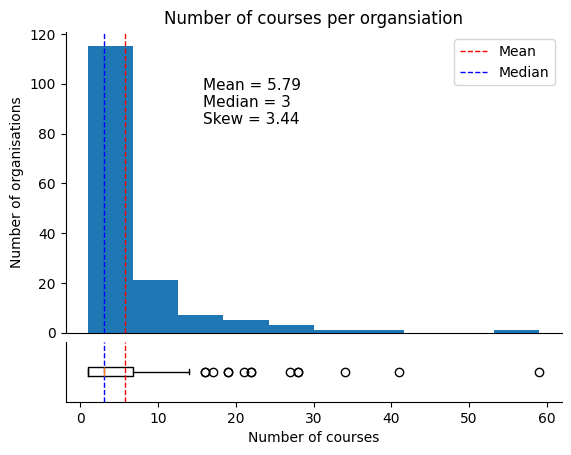

In [147]:
def hist_box_plot(dataset, title, x_label, y_label, bins=None, 
                  offset=10, round_mean=None, round_median=None,
                  round_skew=2, xrot=0):
    """
    Creates a histogram of a dataset, with a boxplot of the data included below as well.

    dataset: the series to create plots of
    title: title of the plot (added to the top plot)
    x_label: x axis label (added to the top plot)
    y_label: y axis label (added to the bottom plot)
    bins: number of bin in the histogram. Default=None (default number of bins in plt.hist)
    offset: =10
    round_mean: number of decimal places to round mean annotation to. Default=None (integer)
    round_median: number of decimal places to round median annotation to. Default=None (integer)
    round_skew: number of decimal places to round skew annotation to. Default=2 (2dp, set to None for integer)
    xrot: rotation of x tick labels on bottom plot. Default=0
    """

    # creating the plots
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[5,1]})
    (n, bins, patches) = ax1.hist(dataset, bins=bins)
    ax2.boxplot(dataset, vert=False)

    # plot formatting
    fig.subplots_adjust(hspace=0.05)
    ax1.set_title(title)
    ax2.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_xticks([])
    ax2.set_yticks([])
    ax2.tick_params(axis='x', labelrotation=xrot)
    ax2.ticklabel_format(axis='x', style='plain')
    if dataset.min() < 4.0 and dataset.max() <= 5.0:
        ax2.set_xticks(np.arange(3.3,5.0,step=0.2))
    
    skew = dataset.skew()
    mean = dataset.mean()
    median = dataset.median()

    # mean & median lines, removing unnecessary borders
    for ax in [ax1, ax2]:
        ax.axvline(mean, color='r', linestyle='dashed', linewidth=1, label = 'Mean')
        ax.axvline(median, color='b', linestyle='dashed', linewidth=1, label = 'Median')
        ax.spines[['right','top']].set_visible(False)

    ax1.legend()
    
    # setting the offset of annotations, anchored below or above the lowest/highest line
    if skew >= 0:
        if mean > median:
            xcoord = mean + offset
        else:
            xcoord = median + offset
    else:
        if mean > median:
            xcoord = mean - offset
        else:
            xcoord = median - offset

    # rounding mean, median, skew for annotation
    if round_mean:
        mean = round(mean,round_mean)
    else:
        mean = round(mean)    
    
    if round_median:
        median = round(median,round_median)
    else:
        median = round(median)

    if round_skew:
        skew = round(skew,round_skew)
    else:
        skew = round(skew)

    # adding mean, median, skew annotations
    ax1.annotate(f'Mean = {mean}',
            xy=(xcoord,n.max() * 0.85), xycoords='data',
            fontsize=11)
    ax1.annotate(f'Median = {median}',
            xy=(xcoord,n.max() * 0.79), xycoords='data',
            fontsize=11)
    ax1.annotate(f'Skew = {skew}',
            xy=(xcoord,n.max() * 0.73), xycoords='data',
            fontsize=11)            

hist_box_plot(orgs['count'],'Number of courses per organsiation','Number of courses','Number of organisations', round_mean=2);

There is a very strong positive skew, with most organizations providing less than the average number of courses - this is inline with the mode calculated earlier, with the most common number of courses being 1. There is a long tail of extreme values, with outliers significantly more than average.

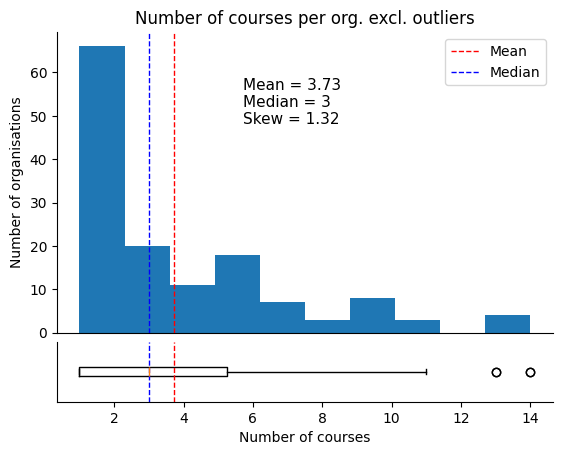

In [148]:
def outliers(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    return dataset[(dataset < q1 - 1.5 * iqr) | (dataset > q3 + 1.5 * iqr)]

outliers_no_courses = outliers(orgs['count'])

hist_box_plot(orgs.loc[~orgs.index.isin(outliers_no_courses.index)]['count'],
              'Number of courses per org. excl. outliers','Number of courses',
              'Number of organisations',offset=2,round_mean=2);

If I remove the outliers (based on 1.5 interquartile range), the skew decreases substantially, although there is still strong positive skew. The mode is more apparent in this plot - the first bin (1-2 courses) is significantly larger than any other bin.

### Difficulty and Certificate Type<a name="diff-cert"></a>

In this section, I am going to look at `course_difficulty` and `course_Certificate_type`.

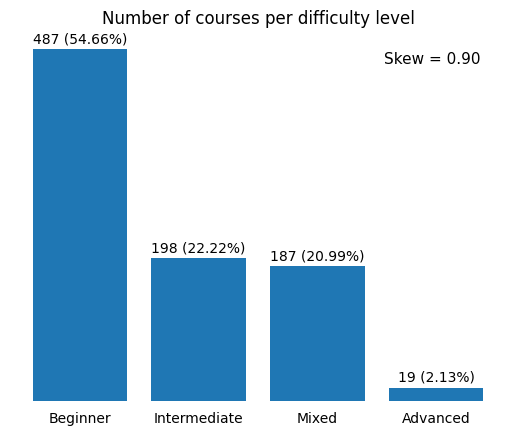

In [149]:
def bar_plots(x,y,title,skew=False):
    """
    Creates a bar plot of the provided dataset and formats.

    x: x axis bins/labels
    y: y axis values (heights of bars)
    title: title for the plot
    skew: if skew should be added as annotation. Default=False
    """

    # create plot
    fig, ax = plt.subplots()
    ax.bar(x, y, align='center', linewidth=0)

    # formatting
    ax.set_title(title)    
    ax.tick_params(top=False, bottom=False, left=False,
                    right=False, labelleft=False, labelbottom=True)
    ax.spines[:].set_visible(False)

    total = y.sum()

    # adding labels to bars
    for rect, label in zip(ax.patches, y):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, 
                height + 5, f"{label} ({height/total:.2%})", ha="center", va="bottom")

    # adding skew annotation if required
    if skew:
        ax.annotate(f'Skew = {y.skew():.2f}',
                xy=(.6, .80), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=11)

xvals = ['Beginner','Intermediate','Mixed','Advanced']
yvals = data.course_difficulty.value_counts()
bar_plots(xvals,yvals,'Number of courses per difficulty level',skew=True);

Over half of all courses (nearly 55%) are `Beginner`. There is a similar number of `Intermediate` and `Mixed` courses, with a different of less than 2%, and `Advanced` is by far the smallest group. There is a significant positive skew towards less difficult courses. 

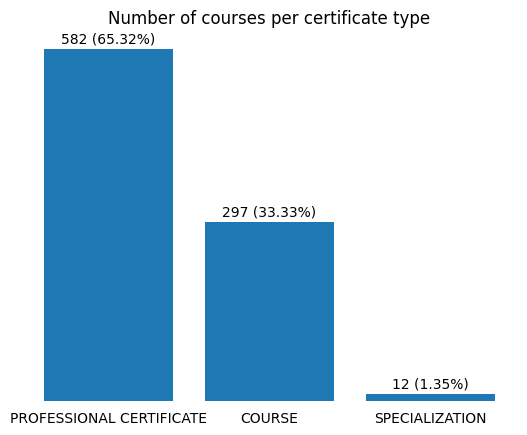

In [150]:
xvals = ['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION']
yvals = data.course_Certificate_type.value_counts()
bar_plots(xvals,yvals,'Number of courses per certificate type');

Almost $2/3$ of courses have type `PROFESSIONAL CERTIFICATE`. Another $1/3$ have type `COURSE`. Less than 2% have type `SPECIALIZATION`. 

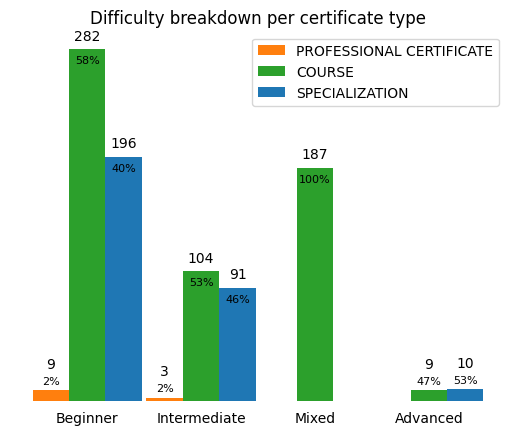

In [151]:
# getting difficulty data for each course
yvals_course = cert_type_difficulty.loc['COURSE']['count']
yvals_prof = cert_type_difficulty.loc['PROFESSIONAL CERTIFICATE']['count']
yvals_spel = cert_type_difficulty.loc['SPECIALIZATION']['count']

# re-ordering data
yvals_course = yvals_course.reindex(index = ['Beginner','Intermediate','Mixed','Advanced'])
yvals_prof = yvals_prof.reindex(index = ['Beginner','Intermediate','Mixed','Advanced'])
yvals_spel = yvals_spel.reindex(index = ['Beginner','Intermediate','Mixed','Advanced'])

# x axis data
xlabels = ['Beginner','Intermediate','Mixed','Advanced']
xvals = np.arange(len(xlabels))

# plotting the data
fig, ax = plt.subplots()
rects1 = ax.bar(xvals-0.32, yvals_prof, 0.32, label='PROFESSIONAL CERTIFICATE', color='tab:orange')
rects2 = ax.bar(xvals, yvals_course, 0.32, label='COURSE', color='tab:green')
rects3 = ax.bar(xvals+0.32, yvals_spel, 0.32, label='SPECIALIZATION',color='tab:blue')

# formatting plot
ax.set_xticks(xvals)
ax.set_xticklabels(xlabels)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
ax.spines[:].set_visible(False)
ax.legend()
ax.set_title('Difficulty breakdown per certificate type')

# percentage of difficulty
diffs = data.course_difficulty.value_counts()
percents = {}

for diff in xlabels:
    percents[f"{diff} - PROFESSIONAL CERTIFICATE"] = float(yvals_prof[diff]/diffs[diff])
    percents[f"{diff} - COURSE"] = float(yvals_course[diff]/diffs[diff])
    percents[f"{diff} - SPECIALIZATION"] = float(yvals_spel[diff]/diffs[diff])

# adding labels to bars
for rects in [rects1,rects2,rects3]:  
    for i, rect in enumerate(rects):
        rect.set(label=f"{xlabels[i]} - {rects.get_label()}")

        height = rect.get_height()
        if height > 50:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 5, 
                f"{int(height)}",    
                ha="center", va="bottom",fontsize = 10
            );
            ax.text(
                rect.get_x() + rect.get_width() / 2, height - 5, 
                f"{percents[rect.get_label()]:.0%}",    
                ha="center", va="top",fontsize = 8
            );
        elif height > 0:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 15, 
                f"{int(height)}",   
                ha="center", va="bottom",fontsize = 10
            );
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 7, 
                f"{percents[rect.get_label()]:.0%}",    
                ha="center", va="center",fontsize = 8
            );


Here is the breakdown of difficulty across the certificate types. There are only `Beginner` and `Intermediate` difficulty `PROFESSIONAL CERTIFICATE` type courses. Only `COURSE` type courses can have any difficulty and is the only type to have `Mixed` difficulty. `SPECIALIZATION` type courses can have any difficulty except `Mixed`. 

The number of `SPECIALIZATION` and `PROFESSIONAL CERTIFICATES` type courses decreases as difficulty increases, with each step up in difficulty having less courses than the previous difficulty. `COURSE` type courses don't follow this same distribution - instead, `Mixed` difficulty is the second largest difficulty and `Intermediate` is the second smallest.

The distribution of certificate types for each difficulty (excluding `Mixed`, as this has only one certificate type) is similar across the groups. Where `PROFESSIONAL CERTIFICATE` appears, it always account for approximately 2% of all courses. `COURSE` and `SPECIALIZATION` each account for approximately half of all courses, although `COURSE` typically accounts for more. The most pronounced difference is in the `Beginner` difficulty, with an 18% difference. For the `Advanced` difficulty, the number of courses is almost the same, with `Beginner` only having 1 less course.

### Course Rating<a name="rating"></a>

This section will focus on `course_rating`. I am going to first look at rating in isolation, then look at how rating differs across certificate type and difficulty.

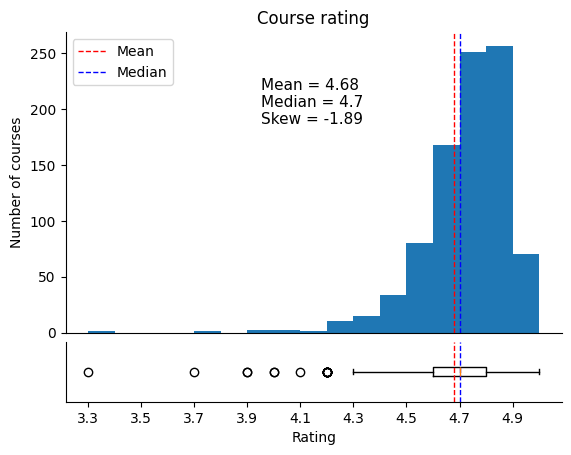

In [152]:
hist_box_plot(data.course_rating, 'Course rating','Rating','Number of courses',
              offset=0.75,round_mean=2,round_median=1,bins=17);

Rating has a strong negative skew, with most courses having a high rating. This is a long but shallow tail of courses with lower ratings, although no scores dip below 3.2, despite the lowest possible rating being 1. Most courses have a rating of 4.5 or better, suggesting most students are satisfied with the courses they take. 

As there is a long tail of outliers, I want to look at this feature without them, to get a better idea of the distribution of the majority of the data.

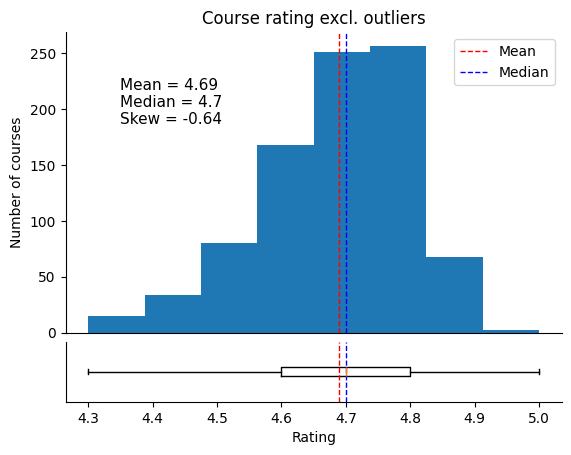

In [153]:
outliers_ratings = outliers(data.course_rating)
hist_box_plot(data.loc[~data.index.isin(outliers_ratings.index)]['course_rating'],
              'Course rating excl. outliers','Rating','Number of courses',8,
              offset=0.35,round_mean=2,round_median=1);

Using my existing outliers function, I have re-drawn the plot without the outliers. The skew has decreased by more than 1 and the distribution now looks like a normal distribution . 

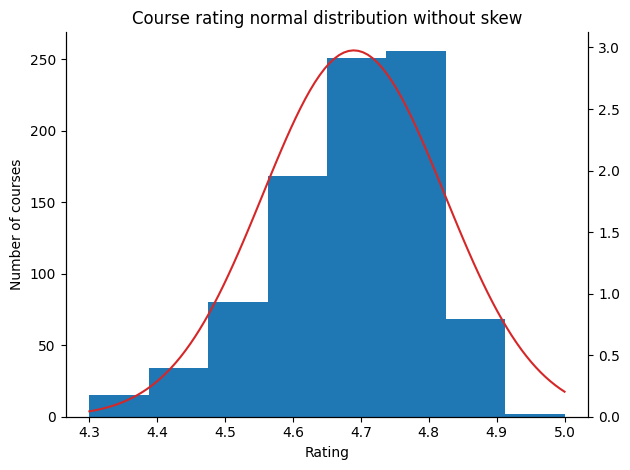

In [154]:
def hist_with_norm_dist(data,title,xlabel,skew=False,bins=None):
    x = np.linspace(data.min(), data.max(), 100)
    if skew:
        a, loc, scale = skewnorm.fit(data)
        p = skewnorm.pdf(x, a, loc, scale)
    else:
        (loc, scale) = norm.fit(data)
        p = norm.pdf(x, loc, scale)

    fig, ax1 = plt.subplots()
    ax1.hist(data,bins=bins)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Number of courses')
    ax1.set_title(title)
    ax1.spines[['top']].set_visible(False)

    ax2 = ax1.twinx()
    ax2.plot(x,p,color='tab:red')
    ax2.spines[['top']].set_visible(False)
    ax2.set_ylim(ymin=0)

    fig.tight_layout()

hist_with_norm_dist(data.loc[~data.index.isin(outliers_ratings.index)]['course_rating'],
                    bins=8, title='Course rating normal distribution without skew',xlabel='Rating')

Plotting the data again with a normal distribution (excluding skew) shows that a normal distributions fits well. 

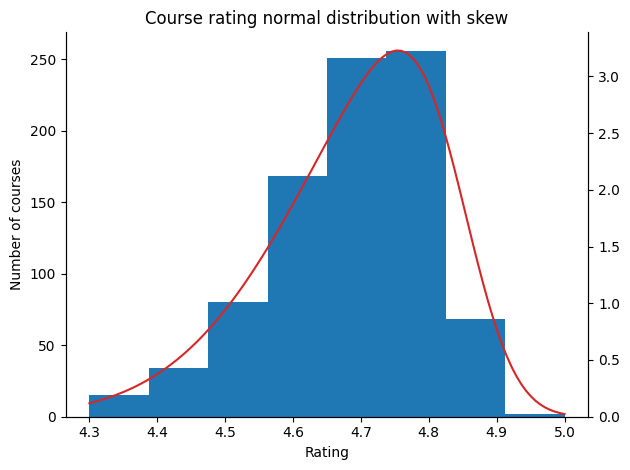

In [155]:
hist_with_norm_dist(data.loc[~data.index.isin(outliers_ratings.index)]['course_rating'],
                    bins=8, title='Course rating normal distribution with skew', skew=True,xlabel='Rating')

Including the skew in the normal distribution improves the fit even more. 

Next, I want to see how ratings differ across difficulty and certificate type. I will focus on certificate type first. 

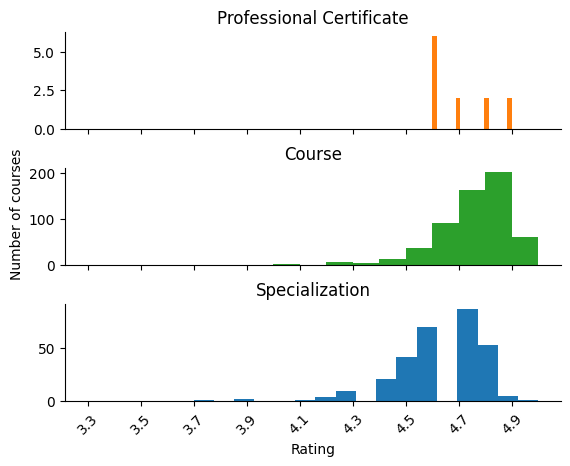

In [156]:
def hist_per_group(dataset,feature,grouping_on,groups,colours,xlabel,ylabel,titles,bins=None):
    # creating the plot with dynamic number of subplots
    fig, axs = plt.subplots(len(groups),1, sharex = True)

    # creating plots for each group
    for i,group in enumerate(groups):
        vals = dataset[dataset[grouping_on] == group][feature]
        axs[i].hist(vals, label=group,color=colours[i],bins=bins)
        axs[i].spines[['top','right']].set_visible(False)
        axs[i].set_title(titles[i])

        if i == len(groups) - 1:
            axs[i].tick_params(axis='x', labelrotation=45)
            axs[i].ticklabel_format(axis='x', style='plain')
            axs[i].set_xlabel(xlabel)
        
        if vals.min() < 4.0 and vals.max() <= 5.0:
            axs[i].set_xticks(np.arange(3.3,5.0,step=0.2))

    # some final formatting (spacing and ylabel)
    fig.subplots_adjust(hspace=0.4)
    fig.text(0.05,0.5, ylabel, ha="center", va="center", rotation=90);

hist_per_group(data,'course_rating','course_Certificate_type',['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION'],
                   ['tab:orange','tab:green','tab:blue'],'Rating','Number of courses',['Professional Certificate','Course','Specialization'],bins=17)


From an initial look, the distributions look quite similar. As it is the smallest group, `PROFESSIONAL CERTIFICATE` has the most broken distribution. `SPECIALIZATION` has the most extreme outliers, although `COURSE` has outliers too. 

Due to the long tail of outliers, the differences are not entirely apparent in this plot, so I will remove these. 

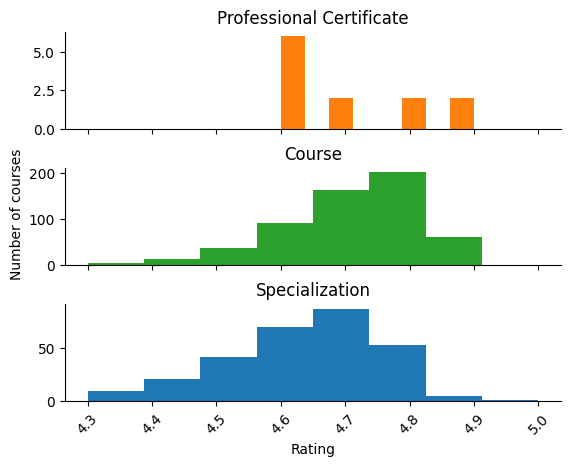

In [157]:
hist_per_group(data[data.course_rating >= 4.3],'course_rating','course_Certificate_type',['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION'],
                   ['tab:orange','tab:green','tab:blue'],'Rating','Number of courses',['Professional Certificate','Course','Specialization'],
                   bins = 8)

Removing the outliers highlights the shape of these distributions better. `COURSE` and `SPECIALIZATION` have very similar distributions, both having negative skew and tail of outliers, and generally having a very similar shape. `COURSE` has a stronger negative skew and a shallower tail, and also has slightly less perfect scores (proportional to the rest of `COURSE` courses), compared to `SPECIALIZATION`. `COURSE` type courses generally have a higher rating than `SPECIALIZATION` courses.

`PROFESSIONAL CERTIFICATES` are the only type to have a positive skew, with most courses having a lower score (within the range of scores). The minimum score is higher than the other 2 types, although this is difficult to compare due to the lack of data. It's possible that students are more satisfied with these courses, but it could also be that the courses selected were some of the highest rated course and more data may show that the ratings follow a similar distribution. 

Now I will focus on difficulty.

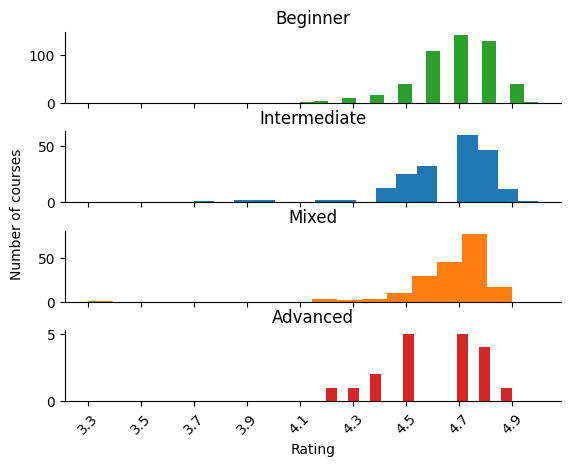

In [158]:
hist_per_group(data,'course_rating','course_difficulty',['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
                   ['tab:green','tab:blue','tab:orange','tab:red'],'Rating','Number of courses',['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
                   bins = 17)

Like with certificate type, the distributions appear quite similar at first look. They all have positive skew and cover similar ranges, with `Intermediate` having the lowest outliers.

Similar to the certificate type chart, the outliers make it more difficult to compare the difficulties directly, so I will plot a version without them.

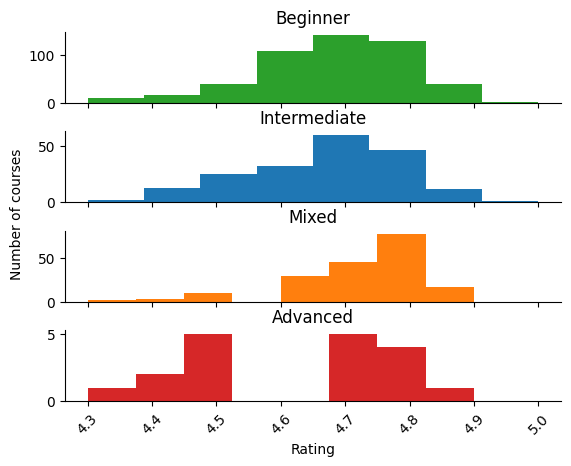

In [159]:
hist_per_group(data[data.course_rating >= 4.3],'course_rating','course_difficulty',['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
                   ['tab:green','tab:blue','tab:orange','tab:red'],'Rating','Number of courses',['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
                   bins = 8)

After removing the outliers, the differences again become more apparent. `Mixed` has the strongest positive skew, whereas `Advanced` has the weakest and has very little skew. `Beginner` and `Intermediate` have very similar distribution and peak at the same value. `Advanced` has a large gap in the middle of the distribution, although this is most likely due to the low number of `Advanced` courses, rather than `Advanced` courses not being rated between 4.5 and 4.7. More data would make this more apparent. 

From this, it is apparent that rating does not seem to differ very much across the different difficulties and certificate types. There are some minor differences to how rating is distributed, but overall the general shape of the dat is consistent. The main discrepancy is with the smallest group in the each area (`Advanced` and `PROFESSIONAL CERTIFICATE`), which is likely due to the lack of data. More data would allow us to see if there is an actual difference or not. 

### Students Enrolled<a name="students"></a>

In this section, I am going to focus on `course_students_enrolled`. As with `course_rating`, I will be looking at this feature first in isolation and then with respect to difficulty and certificate type. 


In [160]:
data.course_students_enrolled.sum()

np.int64(80681900)

There is a total of 80,681,900 students enrolled across all courses in the dataset.

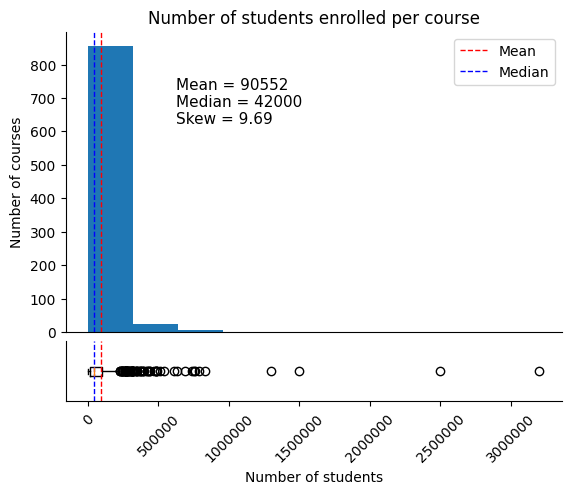

In [161]:
hist_box_plot(data.course_students_enrolled, 'Number of students enrolled per course','Number of students','Number of courses',offset=9**6,xrot=45)

The number of students enrolled in per course have a very strong positive skew, with almost all courses falling in the first bin of the histogram. There is a very shallow but very long tail of outliers. Due to the low volume but high extreme values, the outliers make it difficult to see the distribution of the majority of the data, so I will plot without the outliers.

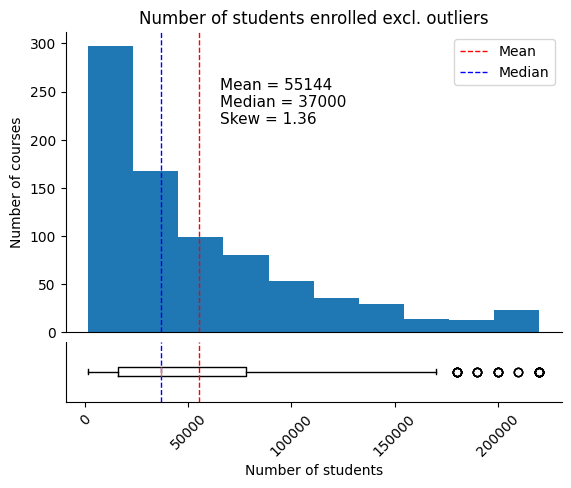

In [162]:
outliers_students = outliers(data.course_students_enrolled)
hist_box_plot(data.loc[~data.index.isin(outliers_students.index)]['course_students_enrolled'], 'Number of students enrolled excl. outliers','Number of students','Number of courses', offset=10000,xrot=45);

Without the outliers, the distribution of the majority of the data is much clearer. There is still strong positive skew, but it's around 7 times less than before. The first bin is still the biggest and is nearly twice the height of any other, but the difference is significantly less than on the previous chart. 

Unlike the course rating plot, this plot doesn't fit a normal distribution as well, due to the concentration of observations in the first bin and the long tail that increases at the end.

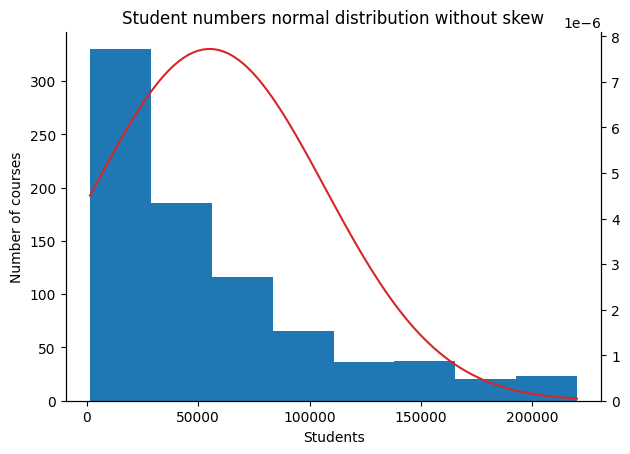

In [163]:
hist_with_norm_dist(data.loc[~data.index.isin(outliers_students.index)]['course_students_enrolled'],
                    bins=8, title='Student numbers normal distribution without skew',xlabel='Students')

A normal distribution without skew fits the data poorly, with substantial differences.

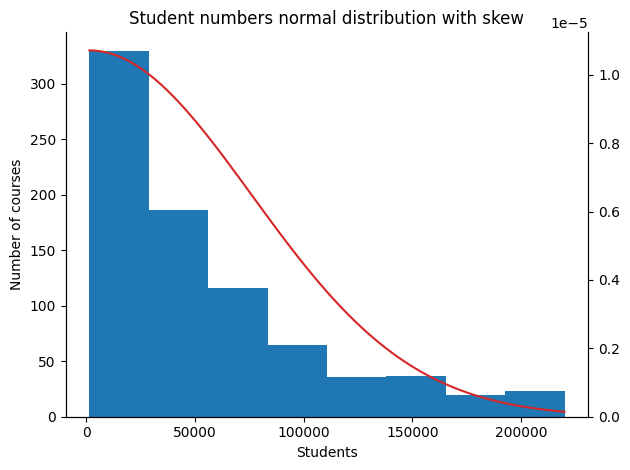

In [164]:
hist_with_norm_dist(data.loc[~data.index.isin(outliers_students.index)]['course_students_enrolled'],
                    bins=8, title='Student numbers normal distribution with skew', skew=True,xlabel='Students')

Even with skew, the normal distribution still doesn't fit particularly well, although it is closer.

Next I am going to look at how student numbers are distributed across certificate type and difficulty, starting with certificate type.

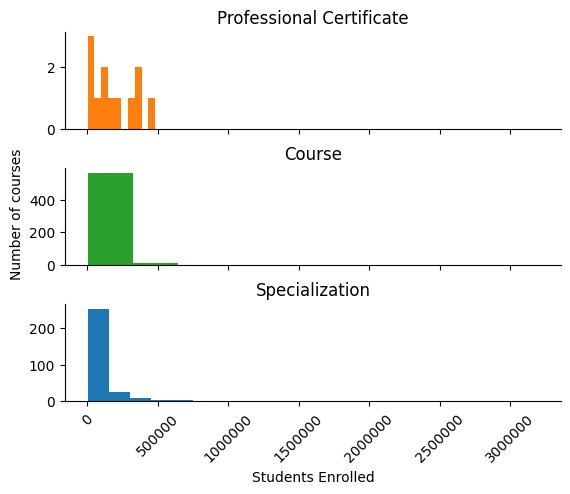

In [165]:
hist_per_group(data,'course_students_enrolled','course_Certificate_type',['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION'],
                   ['tab:orange','tab:green','tab:blue'],'Students Enrolled','Number of courses',['Professional Certificate','Course','Specialization'])


When all the data is included, the distribution superficially look very similar, with almost all observations having lower numbers of students, but they also have long, very shallow tails of outliers. Much like the plot of all student enrolled observations, the outliers make it difficult to properly see the distribution of the majority of the date. 

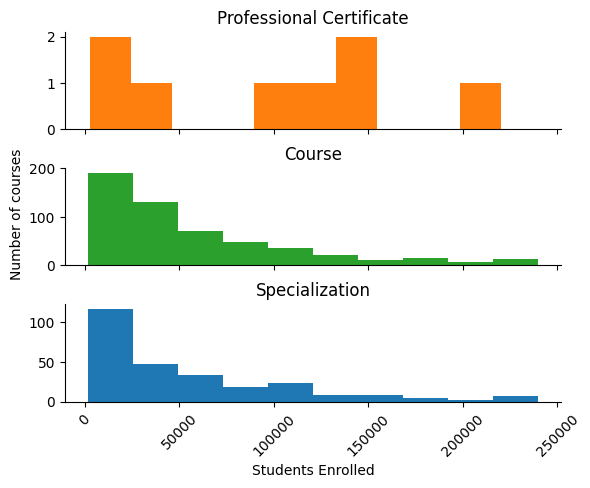

In [166]:
hist_per_group(data[data.course_students_enrolled < 250000],'course_students_enrolled','course_Certificate_type',['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION'],
                   ['tab:orange','tab:green','tab:blue'],'Students Enrolled','Number of courses',['Professional Certificate','Course','Specialization'])


Removing the outliers, the distributions become much clearer. `COURSE` and `SPECIALIZATION` type courses have very similar distribution - they both peak in the first bin, they both have strong positive skew, and they both have a long tail with similar heights (proportional to the rest of the distribution). The main difference is that `COURSE` type courses are more evenly spread out between the first two bins, suggesting that this type has a slightly higher average student number.

The `PROFESSIONAL CERTIFICATE` course type has quite a different distribution. There is no clear skew, and the distribution is not continuous, due to the small number of observations. It's difficult to compare this distribution to the other two, due to how little data there is. This would be improved with more data.

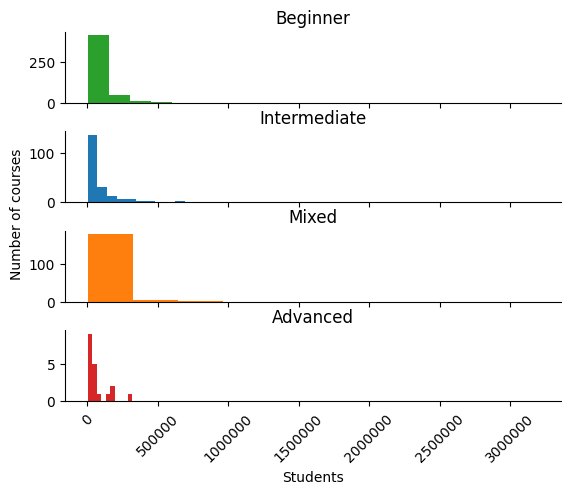

In [167]:
hist_per_group(data,'course_students_enrolled','course_difficulty',['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
                   ['tab:green','tab:blue','tab:orange','tab:red'],'Students','Number of courses',['Beginner', 'Intermediate', 'Mixed', 'Advanced'])

Like certificate type, the distributions look superficially similar, although it is difficult to review properly due to the outliers. `Mixed` stands out the most, as it has a uniform distribution up to about 300,000 students.

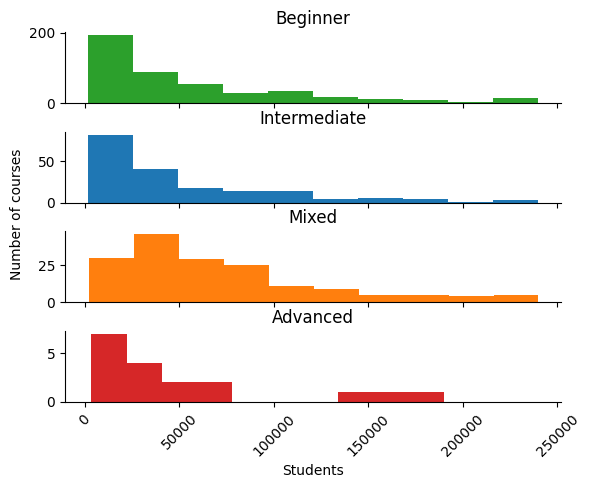

In [168]:
hist_per_group(data[data.course_students_enrolled < 250000],'course_students_enrolled','course_difficulty',['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
                   ['tab:green','tab:blue','tab:orange','tab:red'],'Students','Number of courses',['Beginner', 'Intermediate', 'Mixed', 'Advanced'])

Looking at these distribution without the outliers, we can see than `Beginner` and `Intermediate` courses have very similar distributions, with only minimal differences. `Advanced` is also very similar to these 2 difficulties, and the difference seems to be due primarily to the lack of data for the `Advanced` difficulty. All 3 of these distributions have strong positive skew and peak in the first bin. 

Interestingly, of all the distribution for certificate type (including in isolation and for certificate type), `Mixed` is the only one to not peak in the first bin. While it still clearly has positive skew, it's significantly less pronounced than the other distributions, and the tail of outliers is not as shallow. This suggests that `Advanced` course, on average, have more students per course. 

### Improvements and Future Analysis<a name='improvements'></a>

A larger dataset, particularly for the smallest groups (difficulty `Advanced`, certificate type `PROFESSIONAL CERTIFICATE`), would help give a better view of the distribution and spread of the different types of courses available on Coursera. 

It would also be interesting to get some other features, such as completion rate and percentage of students auditing a courses vs. paying for one. I think adding these feature would allow for more insightful analysis and could reveal more details about Coursea users.

Finally, one of the main improvements I would like to make is to learn how to do quantitative analysis better. Currently, I am largely comparing datasets visually, which can be useful for understanding the general distribution of the data, but the analysis is very surface level. In future projects, I will focus more on more in depth statistical analysis.  